In [3593]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from importlib import reload
import utils
reload(utils)
from utils import *


In [3594]:
# q_inits = np.arange(5)

# y_list = []
# for q_init in q_inits:
    
#     sol = solve(q0 = lambda t : q_init)
#     N = sol.y.shape[0] // 2
#     yt = np.concatenate((sol.y[None,0,:], sol.y[None,N-1,:], sol.y[None,N,:], sol.y[None,-1,:]), axis=0)
#     y_list.append(yt)
    
# y = np.stack(y_list, axis=0)
# print(y.shape)

In [3595]:
q0 = lambda t : 1 + 0.1 * np.sin(2 * np.pi * t / 10)
pl = lambda t : 1.0 + 0.1 * np.sin(2 * np.pi * t / 10)

t_eval = np.linspace(t0, tmax, Nt)

q0_vec = q0(t_eval)
pl_vec = pl(t_eval)



d = generate_gaussian_leaks(1)


sol = solve(q0=q0, pl=pl, d=d[:,0], X=1)

N = sol.y.shape[0] // 2
qs = np.stack((q0(sol.t), sol.y[N-1,:]))
rs = np.stack((pl(sol.t), sol.y[N,:]))

y = np.stack((qs, rs), axis=-1)[:,:,None,:]

y = torch.tensor(y, dtype=torch.float32)
print(y.shape)



torch.Size([2, 50, 1, 2])


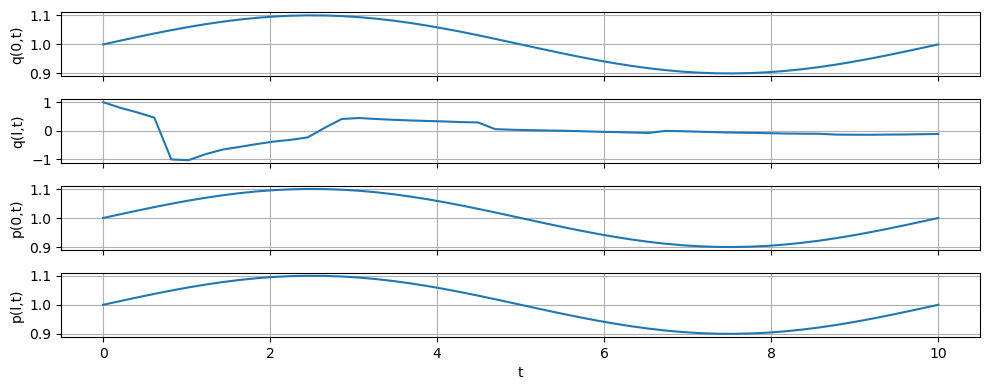

In [3596]:
import matplotlib.pyplot as plt
import torch

t = sol.t  # Assume this is a 1D array or tensor of length 300

# Row labels
labels = ['q(h,t)', 'q(l,t)', 'p(0,t)', 'p(l-h,t)']

# Create subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 4), sharex=True)

axs[0].plot(t, q0_vec)
axs[0].set_ylabel('q(0,t)')
axs[0].grid(True)

axs[1].plot(t, y[1,...,0])
axs[1].set_ylabel('q(l,t)')
axs[1].grid(True)

axs[2].plot(t, y[0,...,0])
axs[2].set_ylabel('p(0,t)')
axs[2].grid(True)

axs[3].plot(t, pl_vec)
axs[3].set_ylabel('p(l,t)')
axs[3].grid(True)

axs[-1].set_xlabel("t")
plt.tight_layout()
plt.show()


In [3597]:
w = torch.tensor([1, 4], dtype=torch.float32)[None, None, :]


In [ ]:
net = DeepONet([42, 42, 42], [42, 42, 42], K=2, activation='tanh')
model = Model(y, net, d)


In [3599]:
model.train(iterations=500, val_interval=10)

step         loss         r1            r2                    dql                         dp0                       ql                         p0                     
10         1.36e+01   8.15e+00   5.41e+00       [-1.7e-02, 0.0e+00]        [-6.5e-04, 2.0e-02]        [-1.0e+00, 1.0e+00]        [1.0e+00, 3.0e+00]       New best model!
20         1.35e+01   8.11e+00   5.39e+00       [-7.7e-02, 0.0e+00]        [0.0e+00, 5.4e-02]         [-1.1e+00, 1.0e+00]        [1.0e+00, 3.0e+00]       New best model!
30         1.33e+01   8.01e+00   5.32e+00       [-2.8e-01, 0.0e+00]        [0.0e+00, 1.9e-01]         [-1.2e+00, 1.0e+00]        [1.0e+00, 3.1e+00]       New best model!
40         1.32e+01   7.88e+00   5.31e+00       [-7.1e-01, 0.0e+00]        [0.0e+00, 4.6e-01]         [-1.3e+00, 1.0e+00]        [1.0e+00, 3.4e+00]       New best model!
50         1.32e+01   7.85e+00   5.31e+00       [-8.6e-01, 0.0e+00]        [0.0e+00, 5.0e-01]         [-1.4e+00, 1.0e+00]        [1.0e+00, 3.4e+00]      

KeyboardInterrupt: 

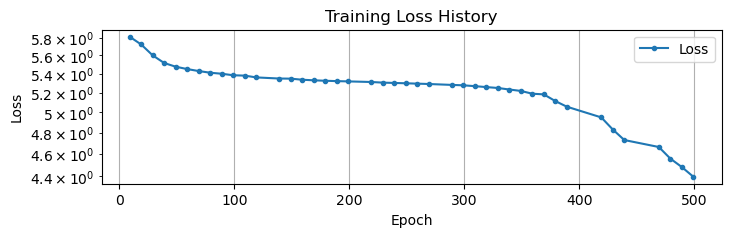

In [ ]:
model.plot_losshistory()

In [ ]:
zt = torch.cartesian_prod(torch.tensor([L], dtype=torch.float32), torch.tensor(t_eval,dtype=torch.float32))
output = model.net(zt, model.X.T)

ql_diff = output[0,:,-1,0].detach().numpy()
p0_diff = output[0,:,-1,1].detach().numpy()

print(model.X[:,5])

tensor([0.5556])


(400, 50)


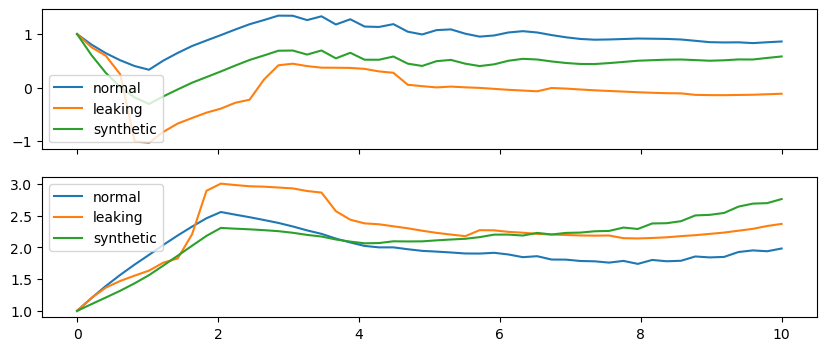

In [ ]:
q0 = lambda t : 1 + 0.1 * np.sin(2 * np.pi * t / 10)
pl = lambda t : 1.0 + 0.1 * np.sin(2 * np.pi * t / 10)

d = generate_gaussian_leaks(1)

sol_0 = solve(q0=q0, pl=pl, d=d[:,0], X=0)
sol_d = solve(q0=q0, pl=pl, d=d[:,0], X=1)

N = sol_0.y.shape[0] // 2

ql_0 = sol_0.y[N-1,:]
p0_0 = sol_0.y[N,:]

ql_d = sol_d.y[N-1,:]
p0_d = sol_d.y[N,:]


fig, axs = plt.subplots(2, 1, figsize=(10, 4), sharex=True)

print(sol_d.y.shape)
axs[0].plot(sol_0.t, ql_0, label='normal')
axs[0].plot(sol_0.t, ql_d, label='leaking')

axs[1].plot(sol_0.t, p0_0, label='normal')
axs[1].plot(sol_0.t, p0_d, label='leaking')

axs[0].plot(t, ql_0 + ql_diff, label='synthetic')
axs[1].plot(t, p0_0 + p0_diff, label='synthetic')

axs[0].legend()
axs[1].legend()

plt.show()

